# Model Development

## 1. Tools & Infrastructure Selection

The tools used are scikit-learn, matplotlib, scipy, TensorFlow/Keras, and seaborn. These were chosen because they implement the analysis techniques, models, and visualizations that I require.

As my personal computer has the NVIDIA GeForce GTX 1050 graphics card I trained all models locally on the machine.

## 2. Algorithm Selection

As a starting point for my model, I will run some initial experiments based on the models that worked best in previous investigations, which were Support Vector Machines (SVM) and TensorFlow.

Abercrombie and Batista-Navarro (2020) achieved their best result with SVM using a model with a linear kernel, L2 regularization, and a squared hinge loss function. Budwhar (2018) also had good results with SVM using an RBF kernel.

Budwhar accomplished his best result with TensorFlow, using a model with three hidden layers, binary crossentropy loss, Adam optimizer, and relu and sigmoid as activation functions. Abercrombie and Batista-Navarro also used an ANN (MLP) with one hidden layer of 100 nodes, batch normalisation, relu activation function, 0.5 dropout regularization, and sigmoid activation on the output layer.

My data set has similarities to both of these previous studies, and I plan to initially experiment with training on 3 different feature subsets:

<ol>
    <li>the preprocessed speech transformed to a bag-of-words representation using scikit_learn CountVectorizer (similar to Abercrombie and Batista-Navarro)</li>
<li>the sentiment scores and word and utterance count generated from the preprocessed speech (similar to Budwhar)</li>
<li>non-speech features: party, constituency, and bill type - the earlier studies ran experiments including and excluding contextual features like these</li>
    </ol>

After running these initial experiments, I hope to be able to identify where further refinements need to be made and also which features and models are most promising and should be explored further.

## 2.1. Additional Pre-Processing and Visualization

### 2.1.1. Removing/Adding Features

Some additional pre-processing was performed, including not importing redundant columns and adding two additional features: word count and whether the TD is in government or not.

In [1]:
import pandas as pd
import numpy as np

In [9]:
# this imports only the required data
col_names = ['Vote', 'Full_Name', 'Constituency', 'Party', 'Bill_Short_Name', 'Bill_Type', 'Utterance_Count', 'Stemmed_Utterance', 'Sentiment_Polarity','Sentiment_Subjectivity']
data = pd.read_csv('dail_vote.csv', usecols=col_names, index_col=False, warn_bad_lines=True, error_bad_lines=False)
# This starts the dataframe index at 1
data.index = data.index + 1

In [3]:
# this shows the number of rows and columns in the data set
data.shape

(437, 10)

In [10]:
# this displays the first few rows of the dataframe to check if it is rendering correctly
data.head(5)

,Vote,Full_Name,Constituency,Party,Bill_Short_Name,Bill_Type,Utterance_Count,Stemmed_Utterance,Sentiment_Polarity,Sentiment_Subjectivity
1,1,Declan Breathnach,Louth,Fianna_Fáil,Rent Freeze (Fair Rent) Bill 2019,Private Member,3,must deal postpon divis relat second stage ren...,0.175000,0.225000
2,1,Eoin Ó Broin,Dublin-Mid-West,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,27,move bill read second time everybodi chamber k...,0.104221,0.366668
3,1,Denise Mitchell,Dublin-Bay-North,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,2,rent state high continu rise time freez rent p...,0.093730,0.362619
4,1,Donnchadh Ó Laoghaire,Cork-South-Central,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,4,rent economi societi extrem hard even one dece...,0.015449,0.485192
5,1,David Cullinane,Waterford,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,4,said last week peopl outsid hous sick tire pol...,-0.008743,0.361981


In [50]:
# adding word count column to the data frame
wordcount = data['Stemmed_Utterance'].str.count(' ')
data['Word_Count'] = wordcount

In [6]:
# this displays the first few rows of the dataframe to check if it is rendering correctly
data.head(5)

,Vote,Full_Name,Constituency,Party,Bill_Short_Name,Bill_Type,Utterance_Count,Stemmed_Utterance,Sentiment_Polarity,Sentiment_Subjectivity,Word_Count
1,1,Declan Breathnach,Louth,Fianna_Fáil,Rent Freeze (Fair Rent) Bill 2019,Private Member,3,must deal postpon divis relat second stage ren...,0.175000,0.225000,57
2,1,Eoin Ó Broin,Dublin-Mid-West,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,27,move bill read second time everybodi chamber k...,0.104221,0.366668,1127
3,1,Denise Mitchell,Dublin-Bay-North,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,2,rent state high continu rise time freez rent p...,0.093730,0.362619,122
4,1,Donnchadh Ó Laoghaire,Cork-South-Central,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,4,rent economi societi extrem hard even one dece...,0.015449,0.485192,222
5,1,David Cullinane,Waterford,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,4,said last week peopl outsid hous sick tire pol...,-0.008743,0.361981,227


I also have added a column that shows if the TD who spoke was in Government or not (Government members in the 32nd Dáil include all TDs in the Fine Gael party and several independents).

In [11]:
data['Is_Government'] = np.where(data['Party']== 'Fine_Gael', 1.0, 0.0)
data['Is_Government'] = np.where(data['Full_Name'] == 'Katherine Zappone', 1.0, data['Is_Government']) 
data['Is_Government'] = np.where(data['Full_Name'] == 'Seán Canney', 1.0, data['Is_Government'])
data['Is_Government'] = np.where(data['Full_Name'] == 'Finian McGrath', 1.0, data['Is_Government'])                                 
data['Is_Government'] = np.where(data['Full_Name'] == 'Denis Naughten', 1.0, data['Is_Government'])                                 
data['Is_Government'] = np.where(data['Full_Name'] == 'Shane Ross', 1.0, data['Is_Government'])                                 

In [12]:
# this displays the first few rows of the dataframe to check if it is rendering correctly
data.head(5)

,Vote,Full_Name,Constituency,Party,Bill_Short_Name,Bill_Type,Utterance_Count,Stemmed_Utterance,Sentiment_Polarity,Sentiment_Subjectivity,Is_Government
1,1,Declan Breathnach,Louth,Fianna_Fáil,Rent Freeze (Fair Rent) Bill 2019,Private Member,3,must deal postpon divis relat second stage ren...,0.175000,0.225000,0.0
2,1,Eoin Ó Broin,Dublin-Mid-West,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,27,move bill read second time everybodi chamber k...,0.104221,0.366668,0.0
3,1,Denise Mitchell,Dublin-Bay-North,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,2,rent state high continu rise time freez rent p...,0.093730,0.362619,0.0
4,1,Donnchadh Ó Laoghaire,Cork-South-Central,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,4,rent economi societi extrem hard even one dece...,0.015449,0.485192,0.0
5,1,David Cullinane,Waterford,Sinn_Féin,Rent Freeze (Fair Rent) Bill 2019,Private Member,4,said last week peopl outsid hous sick tire pol...,-0.008743,0.361981,0.0


### 2.1.2. Class Counts

I also wanted to explore information on class counts to better understand the final data set.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

The votes are about three quarters "Tá/Yes" and one quarter "Níl/No". While the classes are unbalanced, this is a more even split than found in the literature where the previous studies had over 80% yes votes.

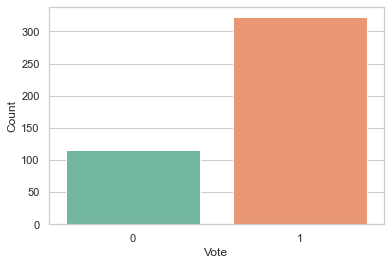

In [17]:
# chart showing class count for votes
sns.set(style="whitegrid")
ax = sns.countplot(x='Vote',  data=data, palette="Set2")
ax.set(xlabel='Vote', ylabel='Count')
plt.show()


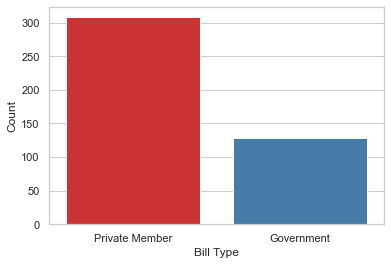

In [18]:
# chart showing class count for bill types
sns.set(style="whitegrid")
ax = sns.countplot(x='Bill_Type',  data=data, palette="Set1")
ax.set(xlabel='Bill Type', ylabel='Count')
plt.show()



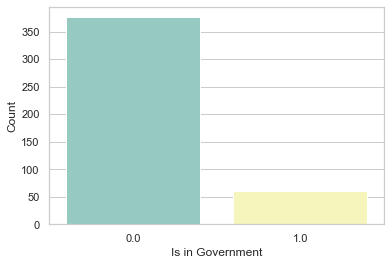

In [19]:
# chart showing class count for government/opposition
sns.set(style="whitegrid")
ax = sns.countplot(x='Is_Government',  data=data, palette="Set3")
ax.set(xlabel='Is in Government', ylabel='Count')
plt.show()

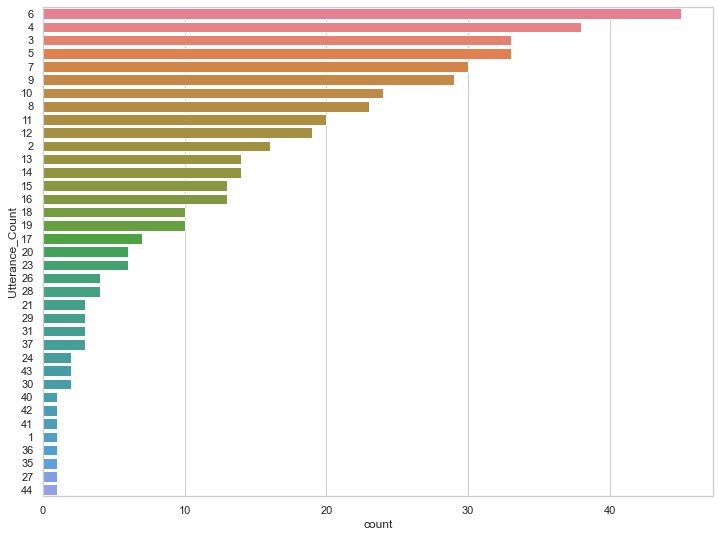

In [22]:
# chart showing class count for constituency
sns.set(style="whitegrid")
# figure size in inches
rcParams['figure.figsize'] = 12,9
constituency = sns.color_palette("husl", 50)

sns.countplot(data=data, y = 'Utterance_Count', palette=constituency, order = data['Utterance_Count'].value_counts().index)
plt.show()

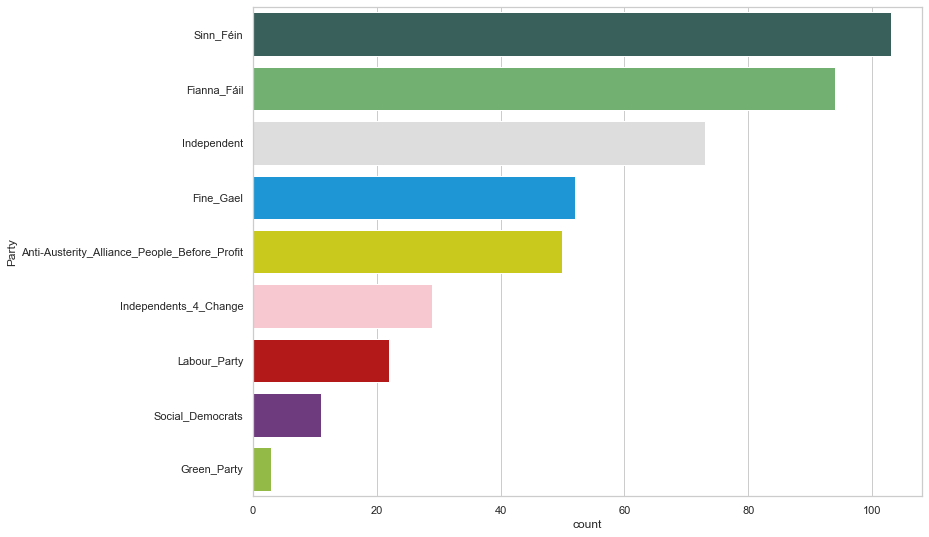

In [23]:
# custom palette using Irish party colors from https://en.wikipedia.org/wiki/Category:Ireland_political_party_colour_templates

party = ["#326760", "#66BB66", "#DDDDDD", "#009FF3", "#E5E500", "#FFC0CB", "#CC0000", "#752F8B", "#99CC33"]
sns.set_palette(party)

sns.set(style="whitegrid")
ax = sns.countplot(data=data, y = 'Party', palette=party, order = data['Party'].value_counts().index)
plt.show()

## 2.2. Creating Bag-of-Words

This step transforms the stemmed debate transcripts into a bag-of-words representation similar to what was done in the literature. It creates one column for each word that appears in the entire corpus and each row contains the number of times each word appears in that particular speech.

For this dataset, there are 9,654 unique word stems so the single "Stemmed_Utterance" column in my dataset transforms into 9,654 columns in this representation.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# this transforms the words in the Stemmed_Utterance column into binary vectors
utterance = data['Stemmed_Utterance']

vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(utterance)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(utterance)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'must': 5596, 'deal': 2155, 'postpon': 6517, 'divis': 2516, 'relat': 7057, 'second': 7538, 'stage': 8077, 'rent': 7107, 'freez': 3430, 'fair': 3088, 'bill': 857, 'taken': 8418, 'tuesday': 8849, 'decemb': 2177, 'question': 6805, 'read': 6900, 'time': 8646, 'claim': 1506, 'accord': 58, 'stand': 8093, 'order': 6007, 'call': 1201, 'next': 5707, 'group': 3725, 'speaker': 8002, 'ask': 523, 'deputi': 2285, 'respect': 7172, 'rule': 7361, 'debat': 2166, 'allow': 254, 'member': 5284, 'contribut': 1838, 'without': 9538, 'interrupt': 4460, 'rachaimid': 6823, 'ar': 456, 'aghaidh': 176, 'go': 3618, 'dti': 2628, 'solidaritypeopl': 7944, 'profit': 6673, 'barri': 716, 'share': 7669, 'paul': 6236, 'murphi': 5590, 'gino': 3592, 'kenni': 4648, 'move': 5538, 'everybodi': 2957, 'chamber': 1385, 'know': 4699, 'complet': 1699, 'control': 1842, 'quick': 6807, 'look': 5007, 'dafti': 2103, 'today': 8672, 'confirm': 1753, 'cork': 1877, 'citi': 1494, 'cost': 1903, 'standard': 8095, 'twobedroom': 8892, 'home': 403

In [43]:
print(vector)

  (0, 58)	1
  (0, 176)	1
  (0, 254)	1
  (0, 456)	1
  (0, 523)	1
  (0, 716)	1
  (0, 857)	2
  (0, 1201)	1
  (0, 1506)	1
  (0, 1838)	1
  (0, 2155)	1
  (0, 2166)	1
  (0, 2177)	1
  (0, 2285)	3
  (0, 2516)	3
  (0, 2628)	1
  (0, 3088)	1
  (0, 3430)	1
  (0, 3592)	1
  (0, 3618)	1
  (0, 3725)	1
  (0, 4460)	1
  (0, 4648)	1
  (0, 5284)	1
  (0, 5590)	1
  :	:
  (436, 8995)	1
  (436, 9023)	2
  (436, 9032)	1
  (436, 9060)	1
  (436, 9065)	1
  (436, 9097)	1
  (436, 9229)	1
  (436, 9232)	3
  (436, 9266)	1
  (436, 9283)	1
  (436, 9303)	1
  (436, 9334)	1
  (436, 9343)	1
  (436, 9352)	1
  (436, 9357)	7
  (436, 9398)	3
  (436, 9428)	5
  (436, 9487)	1
  (436, 9509)	1
  (436, 9528)	1
  (436, 9537)	2
  (436, 9538)	1
  (436, 9560)	2
  (436, 9584)	20
  (436, 9619)	22


## 2.3. Feature Exploration and Selection

### 2.3.1. Exploratory Questions

I have posed some exploratory questions to get to know the data better.

In [27]:
import scipy.stats as sps

#### 2.3.1.1. Other Speech Features

<b>1. Are sentiment polarity and vote related?</b> (One-Way Anova)

In [33]:
# this prints the quantile values 
print(data['Sentiment_Polarity'].quantile([1./3, 2./3]))

0.333333    0.037615
0.666667    0.087182
Name: Sentiment_Polarity, dtype: float64


In [34]:
# this splits the groups into categories aligned with the quantile values
data['Sentiment_Polarity_Category'] = pd.qcut(data['Sentiment_Polarity'], q=3, labels=['Low', 'Medium', 'High'])
print(data['Sentiment_Polarity_Category'])

1        High
2        High
3        High
4         Low
5         Low
        ...  
433      High
434       Low
435      High
436      High
437    Medium
Name: Sentiment_Polarity_Category, Length: 437, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [35]:
# contingency table for ANOVA (using levels of sentiment polarity only for visualization purposes)
polarity_vote_tab = pd.crosstab(index=data['Sentiment_Polarity_Category'], columns=data['Vote'])
polarity_vote_tab

Vote,0,1
Sentiment_Polarity_Category,,
Low,34,112
Medium,42,103
High,39,107


In [36]:
# this runs the one-way ANOVA test
sps.f_oneway(*(data['Sentiment_Polarity'][data['Vote'] == Vote] for Vote in data['Vote'].unique()))


F_onewayResult(statistic=1.0184009970991732, pvalue=0.31345959835573145)

The high p-value means that sentiment polarity and vote are likely not related.

<b>2. Are sentiment subjectivity and vote related?</b> (One-Way Anova)

In [44]:
# this prints the quantile values 
print(data['Sentiment_Subjectivity'].quantile([1./3, 2./3]))

0.333333    0.340561
0.666667    0.398036
Name: Sentiment_Subjectivity, dtype: float64


In [45]:
# this splits the groups into categories aligned with the quantile values
data['Sentiment_Subjectivity_Category'] = pd.qcut(data['Sentiment_Subjectivity'], q=3, labels=['Low', 'Medium', 'High'])
print(data['Sentiment_Subjectivity_Category'])

1         Low
2      Medium
3      Medium
4        High
5      Medium
        ...  
433      High
434    Medium
435      High
436       Low
437      High
Name: Sentiment_Subjectivity_Category, Length: 437, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [46]:
# contingency table for ANOVA (using levels of sentiment subjectivity only for visualization purposes)
subjectivity_vote_tab = pd.crosstab(index=data['Sentiment_Subjectivity_Category'], columns=data['Vote'])
subjectivity_vote_tab

Vote,0,1
Sentiment_Subjectivity_Category,,
Low,41,105
Medium,43,102
High,31,115


In [47]:
# this runs the one-way ANOVA test
sps.f_oneway(*(data['Sentiment_Subjectivity'][data['Vote'] == Vote] for Vote in data['Vote'].unique()))


F_onewayResult(statistic=1.249304428982425, pvalue=0.2643022839203091)

The high p-value means that sentiment subjectivity and vote are likely not related.

<b>3. Are utterance count and vote related?</b> (One-Way Anova)

In [37]:
# this prints the quantile values
print(data['Utterance_Count'].quantile([1./3, 2./3]))

0.333333     6.0
0.666667    11.0
Name: Utterance_Count, dtype: float64


In [38]:
# this splits the groups into categories aligned with the quantile values
data['Utterance_Count_Category'] = pd.qcut(data['Utterance_Count'], q=3, labels=['Low', 'Medium', 'High'])
print(data['Utterance_Count_Category'])

1         Low
2        High
3         Low
4         Low
5         Low
        ...  
433       Low
434      High
435       Low
436    Medium
437      High
Name: Utterance_Count_Category, Length: 437, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [39]:
# contingency table for ANOVA (using levels of utterance count only for visualization purposes)
utterancecount_vote_tab = pd.crosstab(index=data['Utterance_Count_Category'], columns=data['Vote'])
utterancecount_vote_tab

Vote,0,1
Utterance_Count_Category,,
Low,30,136
Medium,25,101
High,60,85


In [48]:
# this runs the one-way ANOVA test
sps.f_oneway(*(data['Utterance_Count'][data['Vote'] == Vote] for Vote in data['Vote'].unique()))


F_onewayResult(statistic=14.036800696060007, pvalue=0.00020341674862694507)

The low p-value means that utterance count during the debate and vote are likely related.

<b>4. Are word count and vote related?</b> (One-Way Anova)

In [51]:
# this prints the quantile values
print(data['Word_Count'].quantile([1./3, 2./3]))

0.333333    344.000000
0.666667    632.666667
Name: Word_Count, dtype: float64


In [52]:
# this splits the groups into categories aligned with the quantile values
data['Word_Count_Category'] = pd.qcut(data['Word_Count'], q=3, labels=['Low', 'Medium', 'High'])
print(data['Word_Count_Category'])

1         Low
2        High
3         Low
4         Low
5         Low
        ...  
433    Medium
434      High
435       Low
436      High
437      High
Name: Word_Count_Category, Length: 437, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [53]:
# contingency table for ANOVA (using levels of word count only for visualization purposes)
wordcount_vote_tab = pd.crosstab(index=data['Word_Count_Category'], columns=data['Vote'])
wordcount_vote_tab

Vote,0,1
Word_Count_Category,,
Low,24,123
Medium,33,111
High,58,88


In [54]:
# this runs the one-way ANOVA test
sps.f_oneway(*(data['Word_Count'][data['Vote'] == Vote] for Vote in data['Vote'].unique()))

F_onewayResult(statistic=17.28160210630917, pvalue=3.882984817128302e-05)

The low p-value means that word count during the debate and vote are likely related.

#### One-way Anova summary:

| Feature| Sentiment_Subjectivity | Sentiment_Polarity | Utterance_Count | Word_Count |
| :-:| --- | --- | --- | --- |
|  p-value |  0.31346 | 0.2643 | <i>0.0002 | <i>0.00004</i>
    
Utterance_Count and Word_Count are likely related to vote whereas the sentiment features are likely not.

#### 2.3.1.2. Non-Speech Features

<b>1. Are party and vote related?</b> (Chi Squared)

In [25]:
#Contingency table for Chi-squared
party_vote_tab = pd.crosstab(index=data['Party'], columns=data['Vote'])
party_vote_tab

Vote,0,1
Party,,
Anti-Austerity_Alliance_People_Before_Profit,11,39
Fianna_Fáil,22,72
Fine_Gael,38,14
Green_Party,1,2
Independent,20,53
Independents_4_Change,6,23
Labour_Party,2,20
Sinn_Féin,13,90
Social_Democrats,2,9


In [28]:
chisq, p, dof, evs = sps.chi2_contingency(party_vote_tab)
print('chi-squared ' + str(chisq))
print('p = ' + str(p))
print('degrees of freedom = ' + str(dof))
print('expected value table: ')
print(evs)

chi-squared 73.82658857923371
p = 8.470414484702957e-13
degrees of freedom = 8
expected value table: 
[[13.15789474 36.84210526]
 [24.73684211 69.26315789]
 [13.68421053 38.31578947]
 [ 0.78947368  2.21052632]
 [19.21052632 53.78947368]
 [ 7.63157895 21.36842105]
 [ 5.78947368 16.21052632]
 [27.10526316 75.89473684]
 [ 2.89473684  8.10526316]]


The low p-value means that party and vote are likely related. 

<b>2. Are bill type and vote related?</b>  (Chi Squared)

In [29]:
#Contingency table for Chi-squared
billtype_vote_tab = pd.crosstab(index=data['Bill_Type'], columns=data['Vote'])
billtype_vote_tab

Vote,0,1
Bill_Type,,
Government,53,76
Private Member,62,246


In [30]:
chisq, p, dof, evs = sps.chi2_contingency(billtype_vote_tab)
print('chi-squared ' + str(chisq))
print('p = ' + str(p))
print('degrees of freedom = ' + str(dof))
print('expected value table: ')
print(evs)

chi-squared 19.523658961470428
p = 9.936140037070013e-06
degrees of freedom = 1
expected value table: 
[[ 33.94736842  95.05263158]
 [ 81.05263158 226.94736842]]


The low p-value means that bill type and vote are likely related.

<b>3. Are constituency and vote related?</b>  (Chi Squared)

In [31]:
#Contingency table for Chi-squared
constituency_vote_tab = pd.crosstab(index=data['Constituency'], columns=data['Vote'])
constituency_vote_tab

Vote,0,1
Constituency,,
Carlow-Kilkenny,2,2
Cavan-Monaghan,0,5
Clare,0,3
Cork-East,8,7
Cork-North-Central,1,11
Cork-North-West,1,2
Cork-South-Central,2,6
Cork-South-West,5,9
Donegal,2,5


In [32]:
chisq, p, dof, evs = sps.chi2_contingency(constituency_vote_tab)
print('chi-squared ' + str(chisq))
print('p = ' + str(p))
print('degrees of freedom = ' + str(dof))
print('expected value table: ')
print(evs)

chi-squared 68.7765640730195
p = 0.002271003131878287
degrees of freedom = 39
expected value table: 
[[ 1.05263158  2.94736842]
 [ 1.31578947  3.68421053]
 [ 0.78947368  2.21052632]
 [ 3.94736842 11.05263158]
 [ 3.15789474  8.84210526]
 [ 0.78947368  2.21052632]
 [ 2.10526316  5.89473684]
 [ 3.68421053 10.31578947]
 [ 1.84210526  5.15789474]
 [ 4.47368421 12.52631579]
 [ 3.68421053 10.31578947]
 [ 2.36842105  6.63157895]
 [ 6.31578947 17.68421053]
 [ 6.05263158 16.94736842]
 [ 3.68421053 10.31578947]
 [ 0.78947368  2.21052632]
 [ 7.10526316 19.89473684]
 [ 4.47368421 12.52631579]
 [ 3.42105263  9.57894737]
 [ 3.15789474  8.84210526]
 [ 1.57894737  4.42105263]
 [ 3.42105263  9.57894737]
 [ 1.31578947  3.68421053]
 [ 3.15789474  8.84210526]
 [ 0.78947368  2.21052632]
 [ 1.84210526  5.15789474]
 [ 2.89473684  8.10526316]
 [ 0.78947368  2.21052632]
 [ 1.31578947  3.68421053]
 [ 4.47368421 12.52631579]
 [ 0.78947368  2.21052632]
 [ 2.10526316  5.89473684]
 [ 3.68421053 10.31578947]
 [ 1.578

The low p-value means that constituency and vote are likely related.

<b>4. Is membership in government related to vote?</b>  (Chi Squared)

In [58]:
#Contingency table for Chi-squared
isgovt_vote_tab = pd.crosstab(index=data['Is_Government'], columns=data['Vote'])
isgovt_vote_tab

Vote,0,1
Is_Government,,
0.0,72,304
1.0,43,18


In [56]:
chisq, p, dof, evs = sps.chi2_contingency(isgovt_vote_tab)
print('chi-squared ' + str(chisq))
print('p = ' + str(p))
print('degrees of freedom = ' + str(dof))
print('expected value table: ')
print(evs)

chi-squared 68.72865566919128
p = 1.129871576313283e-16
degrees of freedom = 1
expected value table: 
[[ 98.94736842 277.05263158]
 [ 16.05263158  44.94736842]]


The low p-value means that membership in government and vote are likely related.

#### Chi-squared summary:

| Feature | Party | Bill_Type | Constituency | Is_Government |
| :-:| --- | --- | --- | --- |
|  chi squared|  73.82658857923371 | 19.523658961470428| 68.7765640730195 | 68.72865566919128
|  p-value |  0.00000000000085 | 0.00000993614004| 0.00227100313188 | 0.0000000000000001
|  degrees of freedom|   8 | 1 | 39 | 1

All of these features are likely related to vote.        

### 2.3.2. Creating Initial Feature Variables

I divided the available features into several groups for initial testing:<br><ul>
    <li><b>bag-of-words:</b> unigram counts</li>
    <li><b>other speech features:</b> sentiment polarity, sentiment subjectivity, speech count, word count</li>
    <li><b>non-speech features:</b> party, bill type, constituency, government/opposition</li>
        </ul>

In developing my model, I am considering the following questions:<ul>
    <li>Can I predict how the TDs voted based on the words they said? (bag-of-words only)</li> 
<li>Can I predict how the TDs voted based on the sentiment and structural features of the words? (other speech features)</li>
<li>Can I predict how the TDs voted based on non-speech features such as party and type of bill? (non-speech features)</li>
<li>Does combining features across more of than of these sets improve on using them individually?</li>
    </ul>

Here I will split my variables into several input (X) and one output (Y) variables.

In [78]:
# Bag-of-Words only

X_BOW = vector.toarray()

print(X_BOW)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [88]:
# Other Speech features only

X_OS = data.filter(regex='Utterance_Count$|Word_Count$|Sentiment_Polarity$|Sentiment_Subjectivity$').values

X_OS_col_names = list(data.filter(regex='Utterance_Count$|Word_Count$|Sentiment_Polarity$|Sentiment_Subjectivity$').columns)

print(X_OS)
print()
print(X_OS_col_names)

[[3.00000000e+00 1.75000000e-01 2.25000000e-01 5.70000000e+01]
 [2.70000000e+01 1.04220779e-01 3.66668068e-01 1.12700000e+03]
 [2.00000000e+00 9.37301590e-02 3.62619048e-01 1.22000000e+02]
 ...
 [3.00000000e+00 1.59848485e-01 4.35606061e-01 2.37000000e+02]
 [1.10000000e+01 1.09117536e-01 3.03554712e-01 7.18000000e+02]
 [1.70000000e+01 7.99034630e-02 4.04797835e-01 1.29500000e+03]]

['Utterance_Count', 'Sentiment_Polarity', 'Sentiment_Subjectivity', 'Word_Count']


The exploratory questions and my early experiments suggested that the sentiment features were significantly different from the count features in this set so I decided to run the logistic regression which confirmed that. I then split them so that I could isolate these two features sets in my experiments.

In [89]:
# Logistic Regression to rank values
test = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k="all")
fit = test.fit(X_OS, y)
print()
# have to manually display as no function to do so available
for index, result in enumerate(fit.scores_):
    print("{0:10}".format(X_OS_col_names[index]), "{0:10}".format(round(result,2)))


Utterance_Count      14.04
Sentiment_Polarity       1.02
Sentiment_Subjectivity       1.25
Word_Count      17.28


In [92]:
# Other Speech features (Sentiment Related)

X_OS_SENT = data.filter(regex='Sentiment_Polarity$|Sentiment_Subjectivity$').values

print(X_OS_SENT)

[[ 1.75000000e-01  2.25000000e-01]
 [ 1.04220779e-01  3.66668068e-01]
 [ 9.37301590e-02  3.62619048e-01]
 [ 1.54487180e-02  4.85192308e-01]
 [-8.74285700e-03  3.61980952e-01]
 [ 5.62500000e-02  3.74198718e-01]
 [ 1.37662338e-01  3.86607143e-01]
 [ 4.86045400e-02  4.27677412e-01]
 [-5.14880950e-02  4.01190476e-01]
 [ 5.70389610e-02  3.89427489e-01]
 [ 3.57828280e-02  4.28980350e-01]
 [ 3.44696970e-02  3.84386837e-01]
 [-5.62830690e-02  4.67195767e-01]
 [ 6.69249310e-02  3.64754280e-01]
 [-2.94871790e-02  5.06593407e-01]
 [ 5.49401580e-02  3.09103641e-01]
 [ 1.02941176e-01  3.36274510e-01]
 [ 9.29657690e-02  4.33493266e-01]
 [ 1.16758494e-01  3.18392256e-01]
 [ 1.85944444e-01  4.51555556e-01]
 [ 1.42989510e-01  3.81282051e-01]
 [ 3.70666670e-02  4.21885714e-01]
 [ 1.76515150e-02  4.21060606e-01]
 [ 5.29797980e-02  3.37222222e-01]
 [ 6.70454550e-02  4.25000000e-01]
 [ 5.29411760e-02  3.31372549e-01]
 [ 1.75443800e-02  3.62098789e-01]
 [ 2.40969700e-02  4.20933333e-01]
 [-7.47474700e-03  4

In [93]:
# Other Speech features (Count Related)
X_OS_COUNT = data.filter(regex='Utterance_Count$|Word_Count$').values

print(X_OS_COUNT)

[[   3   57]
 [  27 1127]
 [   2  122]
 [   4  222]
 [   4  227]
 [   3  167]
 [   2  115]
 [  26  906]
 [   7  167]
 [  12  750]
 [   7  393]
 [   9  388]
 [   2  141]
 [  11  542]
 [   5  171]
 [   6  190]
 [   4  194]
 [   2  224]
 [   5  420]
 [   1  131]
 [   2  216]
 [   6  273]
 [   3  225]
 [   2  170]
 [   3  145]
 [   4  197]
 [  14 1010]
 [   4  222]
 [   4  285]
 [   5  206]
 [  12  547]
 [  10  713]
 [   4  254]
 [   3  200]
 [   5  476]
 [   9  559]
 [   8  529]
 [   6  582]
 [   6  247]
 [   2  145]
 [  16  696]
 [   9  589]
 [   6  446]
 [   4  173]
 [   6  310]
 [   3  215]
 [   6  223]
 [   5  314]
 [  14  446]
 [   4  252]
 [   6  292]
 [   6  350]
 [   6  237]
 [   5  235]
 [  12  573]
 [   5  382]
 [   4  200]
 [   4  228]
 [   7  455]
 [   3  171]
 [  10  684]
 [   3  187]
 [   4  227]
 [  10  525]
 [   6  301]
 [   6  356]
 [   4  212]
 [   3  212]
 [   5  344]
 [  20  921]
 [  13  794]
 [  15  591]
 [   3  123]
 [  11  762]
 [  17  896]
 [  11  371]
 [  15 1181]

In [77]:
# class variable
y = data['Vote'].values

[[0 0 0 ... 0.0 0.0 1.0]
 [0 0 0 ... 0.0 0.0 1.0]
 [0 0 0 ... 0.0 0.0 1.0]
 ...
 [0 0 0 ... 0.0 0.0 1.0]
 [0 0 0 ... 0.0 0.0 1.0]
 [0 0 0 ... 0.0 0.0 1.0]]


 ## 2.4. Models

#### Naive/Majority Class Model

One observation that was made in the literature was that a naive/majority class model had relatively high accuracy due to the unbalanced classes in the data sets - because legislation that makes it as far as a vote tends to get majority yes votes. I evaluted the majority class classifier (always predicting a yes vote) on my dataset to form a baseline result which I could compare my trained models against.

In [213]:
ta = data.groupby('Vote').size()[1]
nil = data.groupby('Vote').size()[0]

naive_accuracy = (ta)/(ta+nil)
naive_precision = (ta)/(ta+nil)
naive_recall = (ta)/(ta)
naive_specificity = (0/nil)
naive_f1 = 2*(naive_precision * naive_recall)/(naive_precision + naive_recall)



print("Accuracy: ", naive_accuracy)
print("Precision: ", naive_precision)
print("Recall: ", naive_recall)
print("Specificity:", naive_specificity)
print("F1 Score: ", naive_f1)


Accuracy:  0.7368421052631579
Precision:  0.7368421052631579
Recall:  1.0
Specificity: 0.0
F1 Score:  0.8484848484848484


### 2.4.1. Support Vector Machines

In [96]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

<b>1. Bag-of-Words only (SVM_BOW)</b>

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_BOW, y, test_size=0.3) # 70% training and 30% test

In [135]:
#Create a svm Classifier
SVM_BOW = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM_BOW.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_BOW.predict(X_test)

In [136]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix: \n',matrix)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred,labels=[1,0])
print('Classification report: \n',matrix)
print()
print('Overall Metrics: \n')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion matrix: 
 [[77 11]
 [24 20]]

Classification report: 
               precision    recall  f1-score   support

           1       0.76      0.88      0.81        88
           0       0.65      0.45      0.53        44

    accuracy                           0.73       132
   macro avg       0.70      0.66      0.67       132
weighted avg       0.72      0.73      0.72       132


Overall Metrics: 

Accuracy: 0.7348484848484849
Precision: 0.7623762376237624
Recall: 0.875
F1 Score: 0.8148148148148149


<b>2. Other Speech Features only (SVM_OS)</b>

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_OS, y, test_size=0.3) # 70% training and 30% test

In [138]:
#Create a svm Classifier
SVM_OS = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM_OS.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_OS.predict(X_test)

In [140]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix: \n',matrix)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, zero_division=0, labels=[1,0])
print('Classification report: \n',matrix) 
print()
# overall metrics
print('Overall Metrics: \n')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion matrix: 
 [[87  0]
 [45  0]]

Classification report: 
               precision    recall  f1-score   support

           1       0.66      1.00      0.79        87
           0       0.00      0.00      0.00        45

    accuracy                           0.66       132
   macro avg       0.33      0.50      0.40       132
weighted avg       0.43      0.66      0.52       132


Overall Metrics: 

Accuracy: 0.6590909090909091
Precision: 0.6590909090909091
Recall: 1.0
F1 Score: 0.7945205479452054


<b>2a. Other Speech Features only, count related (SVM_OS_COUNT)</b>

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_OS_COUNT, y, test_size=0.3) # 70% training and 30% test

In [143]:
#Create a svm Classifier
SVM_OS_COUNT = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM_OS_COUNT.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_OS_COUNT.predict(X_test)

In [145]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix: \n',matrix)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, zero_division=0, labels=[1,0])
print('Classification report: \n',matrix)
print()
print('Overall Metrics: \n')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion matrix: 
 [[96  0]
 [36  0]]

Classification report: 
               precision    recall  f1-score   support

           1       0.73      1.00      0.84        96
           0       0.00      0.00      0.00        36

    accuracy                           0.73       132
   macro avg       0.36      0.50      0.42       132
weighted avg       0.53      0.73      0.61       132


Overall Metrics: 

Accuracy: 0.7272727272727273
Precision: 0.7272727272727273
Recall: 1.0
F1 Score: 0.8421052631578948


<b>2b. Other Speech Features only, sentiment related (SVM_OS_SENT)</b>

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_OS_SENT, y, test_size=0.3) # 70% training and 30% test

In [147]:
#Create a svm Classifier
SVM_OS_SENT = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM_OS_SENT.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_OS_SENT.predict(X_test)

In [148]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix: \n',matrix)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, zero_division=0, labels=[1,0])
print('Classification report: \n',matrix)
print()
print('Overall Metrics: \n')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion matrix: 
 [[101   0]
 [ 31   0]]

Classification report: 
               precision    recall  f1-score   support

           1       0.77      1.00      0.87       101
           0       0.00      0.00      0.00        31

    accuracy                           0.77       132
   macro avg       0.38      0.50      0.43       132
weighted avg       0.59      0.77      0.66       132


Overall Metrics: 

Accuracy: 0.7651515151515151
Precision: 0.7651515151515151
Recall: 1.0
F1 Score: 0.8669527896995708


<b>3. Other Features Only (SVM_OF)</b>

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_OF, y, test_size=0.3) # 70% training and 30% test

In [150]:
#Create a svm Classifier
SVM_OF = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM_OF.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_OF.predict(X_test)

In [151]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix: \n',matrix)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, zero_division=0, labels=[1,0])
print('Classification report: \n',matrix) 
print()
# overall metrics
print('Overall Metrics: \n')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion matrix: 
 [[88  4]
 [28 12]]

Classification report: 
               precision    recall  f1-score   support

           1       0.76      0.96      0.85        92
           0       0.75      0.30      0.43        40

    accuracy                           0.76       132
   macro avg       0.75      0.63      0.64       132
weighted avg       0.76      0.76      0.72       132


Overall Metrics: 

Accuracy: 0.7575757575757576
Precision: 0.7586206896551724
Recall: 0.9565217391304348
F1 Score: 0.8461538461538461


<b>4. Bag-of-Words and other features (SVM_BOW_OF)</b>

In [156]:
# Bag-of-Words and non-speech features 
X_BOW_OF =  np.append(X_BOW, X_OF, axis=1)

print(X_BOW_OF)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_BOW_OF, y, test_size=0.3) # 70% training and 30% test

In [158]:
#Create a svm Classifier
SVM_X_BOW_OF = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM_X_BOW_OF.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_X_BOW_OF.predict(X_test)

In [159]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix: \n',matrix)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, zero_division=0, labels=[1,0])
print('Classification report: \n',matrix) 
print()
# overall metrics
print('Overall Metrics: \n')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion matrix: 
 [[91 10]
 [13 18]]

Classification report: 
               precision    recall  f1-score   support

           1       0.88      0.90      0.89       101
           0       0.64      0.58      0.61        31

    accuracy                           0.83       132
   macro avg       0.76      0.74      0.75       132
weighted avg       0.82      0.83      0.82       132


Overall Metrics: 

Accuracy: 0.8257575757575758
Precision: 0.875
Recall: 0.900990099009901
F1 Score: 0.8878048780487806


<b>5. Bag-of-Words, other features, other speech features - sentiment related (SVM_ALL)</b>

In [161]:
# Bag-of-Words, non-speech features, other speech features Sentiment Related)
X_ALL =  np.append(X_BOW_OF, X_OS_SENT, axis=1)

print(X_ALL)

[[0.         0.         0.         ... 1.         0.175      0.225     ]
 [0.         0.         0.         ... 1.         0.10422078 0.36666807]
 [0.         0.         0.         ... 1.         0.09373016 0.36261905]
 ...
 [0.         0.         0.         ... 1.         0.15984849 0.43560606]
 [0.         0.         0.         ... 1.         0.10911754 0.30355471]
 [0.         0.         0.         ... 1.         0.07990346 0.40479783]]


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_ALL, y, test_size=0.3) # 70% training and 30% test

In [164]:
#Create a svm Classifier
SVM_X_ALL = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM_X_ALL.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_X_ALL.predict(X_test)

In [165]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix: \n',matrix)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, zero_division=0, labels=[1,0])
print('Classification report: \n',matrix) 
print()
# overall metrics
print('Overall Metrics: \n')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion matrix: 
 [[90 13]
 [16 13]]

Classification report: 
               precision    recall  f1-score   support

           1       0.85      0.87      0.86       103
           0       0.50      0.45      0.47        29

    accuracy                           0.78       132
   macro avg       0.67      0.66      0.67       132
weighted avg       0.77      0.78      0.78       132


Overall Metrics: 

Accuracy: 0.7803030303030303
Precision: 0.8490566037735849
Recall: 0.8737864077669902
F1 Score: 0.8612440191387559


###  SVM Model Comparison Table

| Metric/Algorithm | NAIVE | SVM_BOW | SVM_OS | SV_OS_COUNT | SVM_OS_SENT | SVM_OF| SVM_BOW_OF | SVM_ALL | 
| :-:| --- | --- | --- | --- | --- | --- | --- | --- | 
|  accuracy | 0.7368 | 0.7348 | 0.6591 | 0.6591 | 0.7651 | 0.7575 | <b>0.8258</b> | 0.7803 |
|  precision | 0.7368 | 0.7624 | 0.6591 | 0.6591 | 0.7651 | 0.7586 | <b>0.875</b> | 0.849 |
|  recall |  1 | 0.875 | 1 | 1 | 1| 0.9565 | 0.901 | 0.8738 |
|  specificity |  0 | 0.45  | 0 | 0 | 0 | 0.30 | <b>0.58</b>| 0.45 |
|  F1 | 0.8484 | 0.8148| 0.7945 | 0.7945| 0.8669 | 0.8461 | <b>0.8878<b> | 0.8612 |



The best performing model is Bag-of-Words/Other Features model, which clearly performs best on all metrics other than recall.

The model containing all features, except for the count features were removed because in early testing they degraded performace, was also quite strong and better than the Naive classifier.

The models containing the Other Speech features (SVM_OS, SVM_OS_COUNT, SVM_OS_SENT) all learned the naive classifier. The difference in accuracy/precision is likely due to the make-up of the particular generated test set.

The models trained with Bag-of-Words and Other Features in isolation did not perform as well as the combination of these features.

Based on this, SVM_BOW_OF and SVM_ALL are promising for further refinement.

### 2.4.2. TensorFlow

In [170]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

<b>1. Bag-of-Words only (TF_BOW)</b>

Train on 292 samples, validate on 145 samples
Epoch 1/20
292/292 [==============================] - 14s 46ms/sample - loss: 0.6314 - acc: 0.7466 - val_loss: 0.6048 - val_acc: 0.7241
Epoch 2/20
292/292 [==============================] - 5s 18ms/sample - loss: 0.4069 - acc: 0.8664 - val_loss: 0.6050 - val_acc: 0.7379
Epoch 3/20
292/292 [==============================] - 5s 18ms/sample - loss: 0.2445 - acc: 0.9418 - val_loss: 0.6294 - val_acc: 0.7310
Epoch 4/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.1322 - acc: 0.9726 - val_loss: 0.8101 - val_acc: 0.7586
Epoch 5/20
292/292 [==============================] - 5s 16ms/sample - loss: 0.0666 - acc: 0.9966 - val_loss: 0.7696 - val_acc: 0.7448
Epoch 6/20
292/292 [==============================] - 5s 16ms/sample - loss: 0.0374 - acc: 1.0000 - val_loss: 0.8806 - val_acc: 0.7586
Epoch 7/20
292/292 [==============================] - 7s 24ms/sample - loss: 0.0207 - acc: 1.0000 - val_loss: 1.0271 - val_acc: 0.7724
Epoch 8/

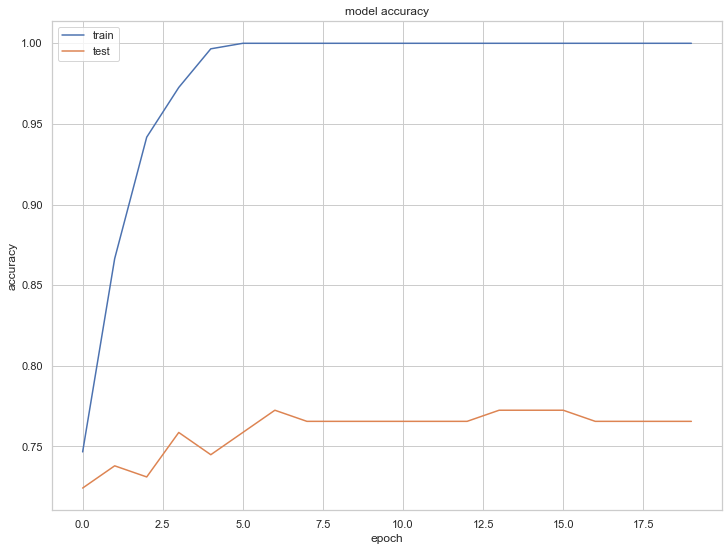

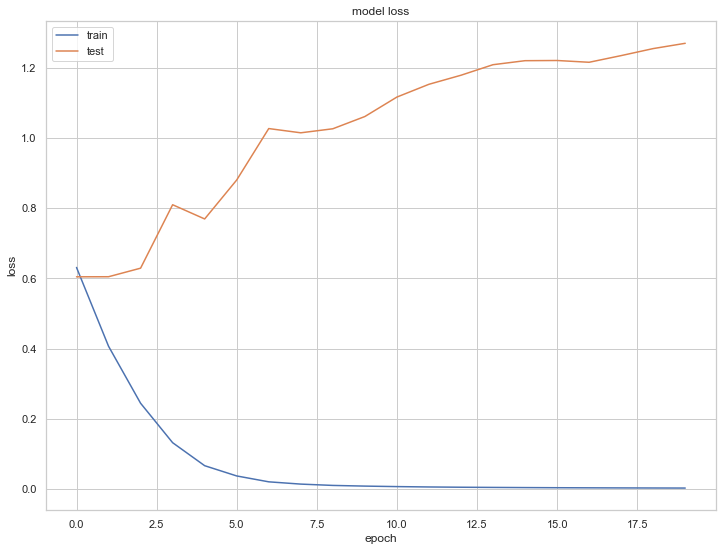

In [215]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=9654, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_BOW, y, validation_split=0.33, epochs=20)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<b>2. Other Speech Features only (TF_OS)</b>

Train on 292 samples, validate on 145 samples
Epoch 1/20
292/292 [==============================] - 14s 49ms/sample - loss: 6.0170 - acc: 0.5685 - val_loss: 0.7969 - val_acc: 0.4621
Epoch 2/20
292/292 [==============================] - 4s 14ms/sample - loss: 1.1807 - acc: 0.7123 - val_loss: 2.1232 - val_acc: 0.2759
Epoch 3/20
292/292 [==============================] - 4s 14ms/sample - loss: 1.4469 - acc: 0.5479 - val_loss: 1.1895 - val_acc: 0.2759
Epoch 4/20
292/292 [==============================] - 4s 13ms/sample - loss: 1.0396 - acc: 0.5514 - val_loss: 0.8275 - val_acc: 0.4138
Epoch 5/20
292/292 [==============================] - 4s 13ms/sample - loss: 1.3970 - acc: 0.4726 - val_loss: 1.1032 - val_acc: 0.7241
Epoch 6/20
292/292 [==============================] - 3s 12ms/sample - loss: 1.0940 - acc: 0.5377 - val_loss: 0.7244 - val_acc: 0.6207
Epoch 7/20
292/292 [==============================] - 4s 12ms/sample - loss: 1.2631 - acc: 0.5068 - val_loss: 1.5689 - val_acc: 0.7241
Epoch 8/

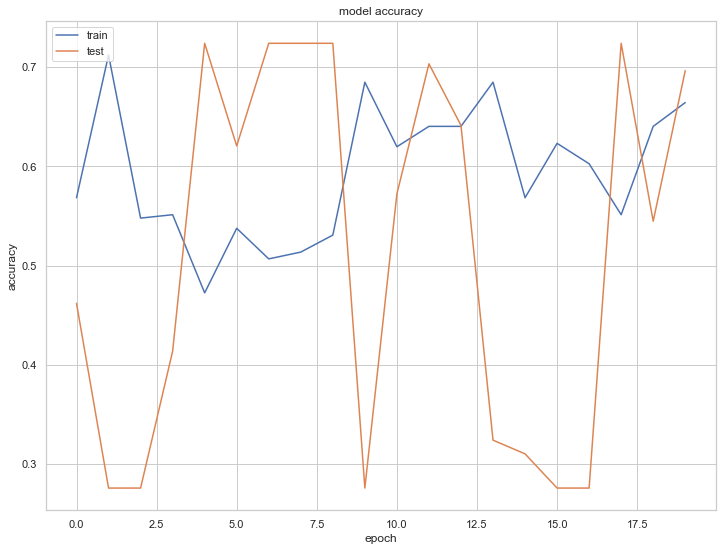

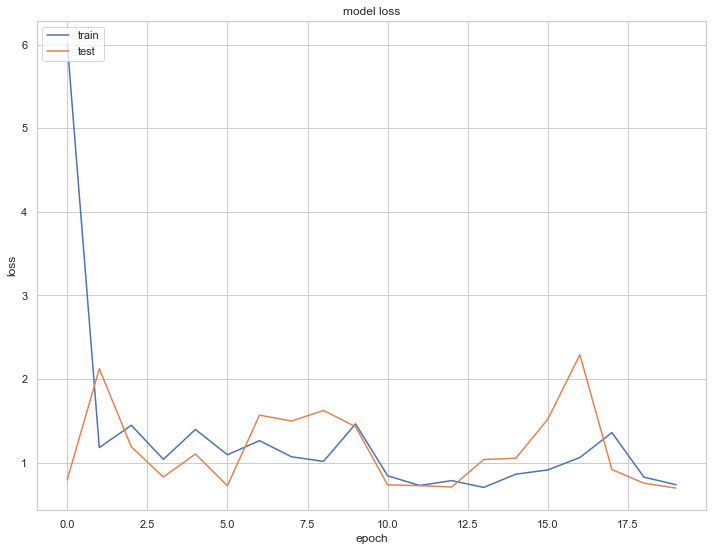

In [203]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=4, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OS, y, validation_split=0.33, epochs=20)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<b>2a. Other Speech Features only, count related (TF_OS_COUNT)</b>

Train on 292 samples, validate on 145 samples
Epoch 1/20
292/292 [==============================] - 12s 42ms/sample - loss: 0.8712 - acc: 0.5685 - val_loss: 1.0723 - val_acc: 0.7241
Epoch 2/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.7899 - acc: 0.6747 - val_loss: 0.7903 - val_acc: 0.7241
Epoch 3/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.7743 - acc: 0.6678 - val_loss: 0.9144 - val_acc: 0.3034
Epoch 4/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.7090 - acc: 0.6610 - val_loss: 0.6993 - val_acc: 0.7034
Epoch 5/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.6612 - acc: 0.7123 - val_loss: 0.6900 - val_acc: 0.6759
Epoch 6/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.6593 - acc: 0.7158 - val_loss: 0.7094 - val_acc: 0.7172
Epoch 7/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.6611 - acc: 0.7055 - val_loss: 0.6914 - val_acc: 0.7034
Epoch 8/

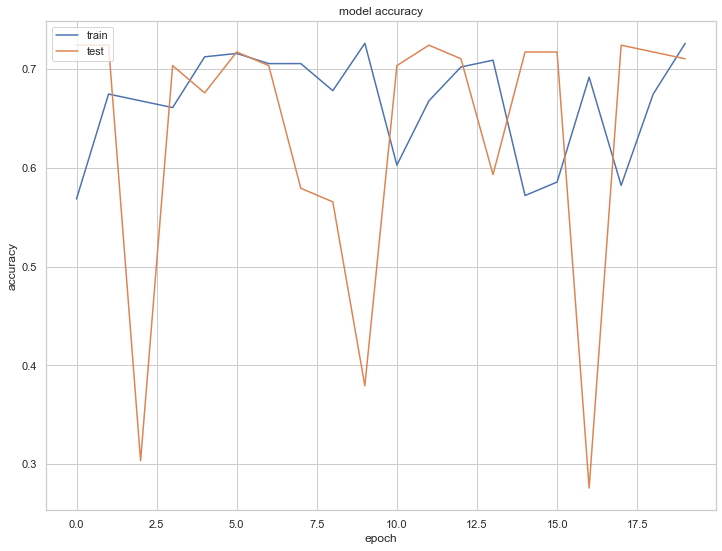

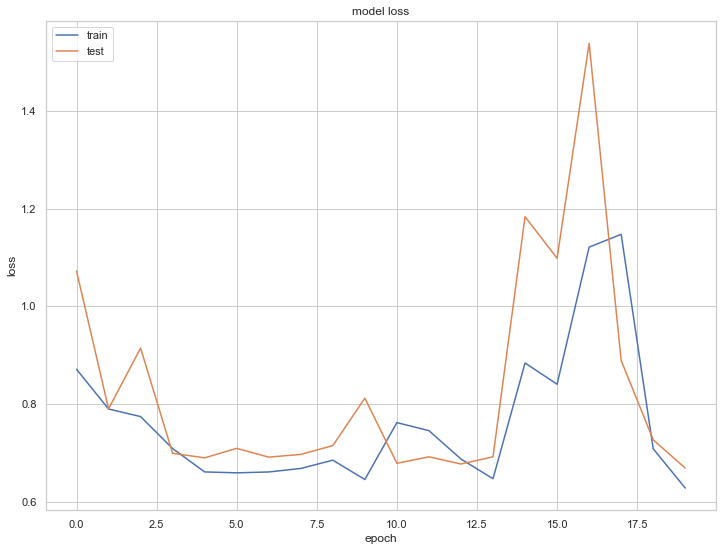

In [206]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=2, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OS_COUNT, y, validation_split=0.33, epochs=20)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<b>2b. Other Speech Features only, sentiment related (TF_OS_SENT)</b>

Train on 292 samples, validate on 145 samples
Epoch 1/20
292/292 [==============================] - 14s 47ms/sample - loss: 0.6639 - acc: 0.7432 - val_loss: 0.6528 - val_acc: 0.7241
Epoch 2/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.6376 - acc: 0.7432 - val_loss: 0.6335 - val_acc: 0.7241
Epoch 3/20
292/292 [==============================] - 3s 12ms/sample - loss: 0.6157 - acc: 0.7432 - val_loss: 0.6166 - val_acc: 0.7241
Epoch 4/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.5970 - acc: 0.7432 - val_loss: 0.6036 - val_acc: 0.7241
Epoch 5/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.5835 - acc: 0.7432 - val_loss: 0.5952 - val_acc: 0.7241
Epoch 6/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.5739 - acc: 0.7432 - val_loss: 0.5924 - val_acc: 0.7241
Epoch 7/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.5704 - acc: 0.7432 - val_loss: 0.5907 - val_acc: 0.7241
Epoch 8/

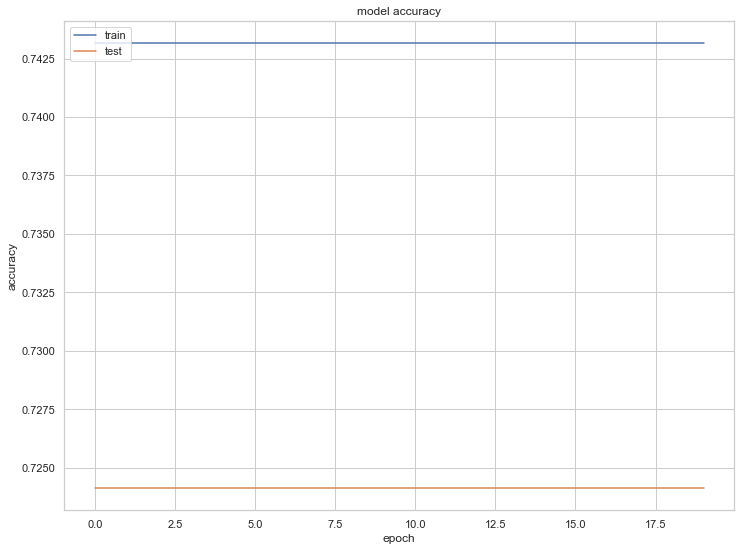

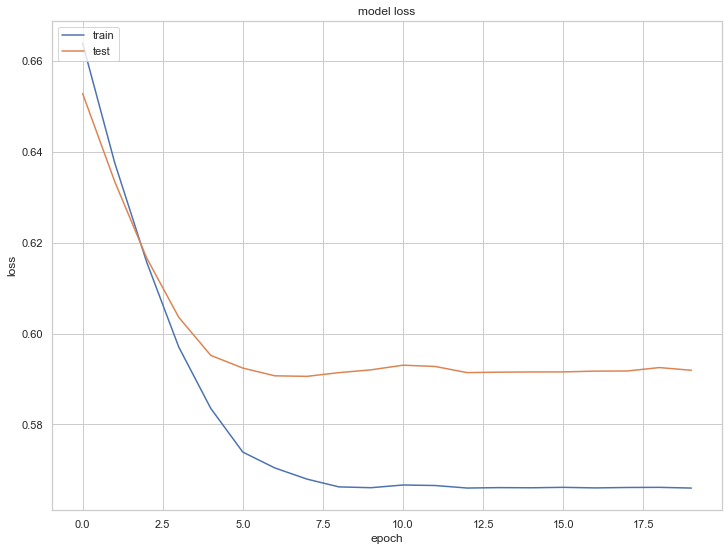

In [207]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=2, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OS_SENT, y, validation_split=0.33, epochs=20)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<b>3. Other Features Only (TF_OF)</b>

Train on 292 samples, validate on 145 samples
Epoch 1/20
292/292 [==============================] - 12s 42ms/sample - loss: 0.6582 - acc: 0.7226 - val_loss: 0.6449 - val_acc: 0.7241
Epoch 2/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.6269 - acc: 0.7432 - val_loss: 0.6192 - val_acc: 0.7241
Epoch 3/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.6012 - acc: 0.7432 - val_loss: 0.5946 - val_acc: 0.7241
Epoch 4/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.5771 - acc: 0.7432 - val_loss: 0.5725 - val_acc: 0.7241
Epoch 5/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.5556 - acc: 0.7432 - val_loss: 0.5539 - val_acc: 0.7241
Epoch 6/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.5389 - acc: 0.7432 - val_loss: 0.5378 - val_acc: 0.7241
Epoch 7/20
292/292 [==============================] - 3s 12ms/sample - loss: 0.5211 - acc: 0.7432 - val_loss: 0.5261 - val_acc: 0.7241
Epoch 8/

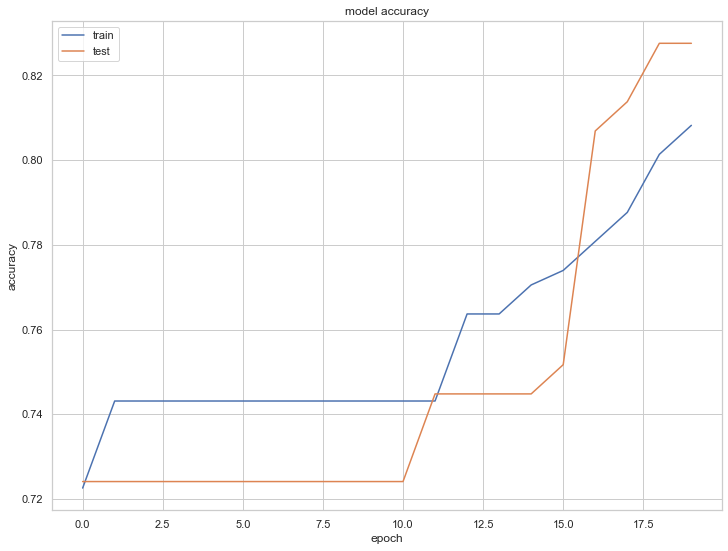

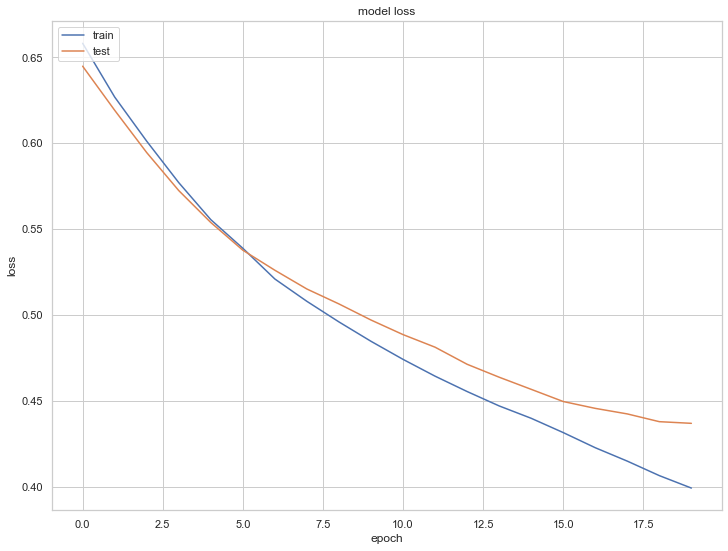

In [208]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=52, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, epochs=20)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<b>4. Bag-of-Words and other features (TF_BOW_OF)</b>

Train on 292 samples, validate on 145 samples
Epoch 1/20
292/292 [==============================] - 12s 42ms/sample - loss: 0.6867 - acc: 0.5925 - val_loss: 0.6292 - val_acc: 0.7241
Epoch 2/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.5205 - acc: 0.7774 - val_loss: 0.6121 - val_acc: 0.7241
Epoch 3/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.3774 - acc: 0.8938 - val_loss: 0.5803 - val_acc: 0.7448
Epoch 4/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.2488 - acc: 0.9555 - val_loss: 0.6141 - val_acc: 0.7448
Epoch 5/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.1567 - acc: 0.9897 - val_loss: 0.6137 - val_acc: 0.7862
Epoch 6/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.0967 - acc: 1.0000 - val_loss: 0.6394 - val_acc: 0.7862
Epoch 7/20
292/292 [==============================] - 4s 14ms/sample - loss: 0.0600 - acc: 1.0000 - val_loss: 0.6975 - val_acc: 0.7931
Epoch 8/

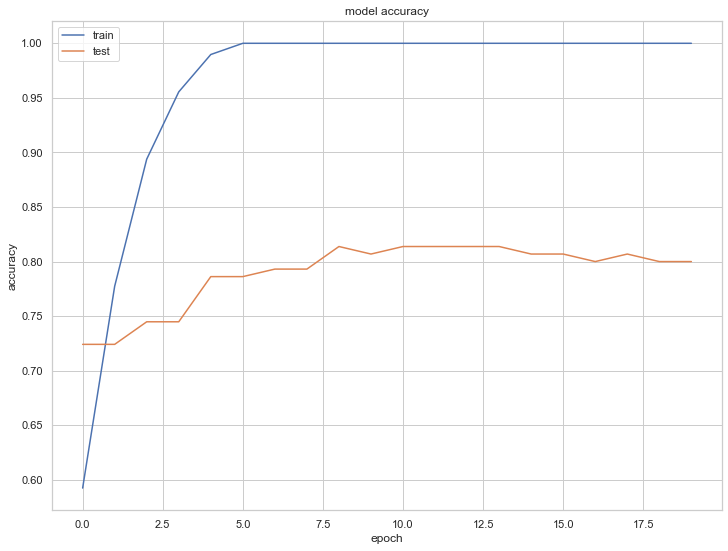

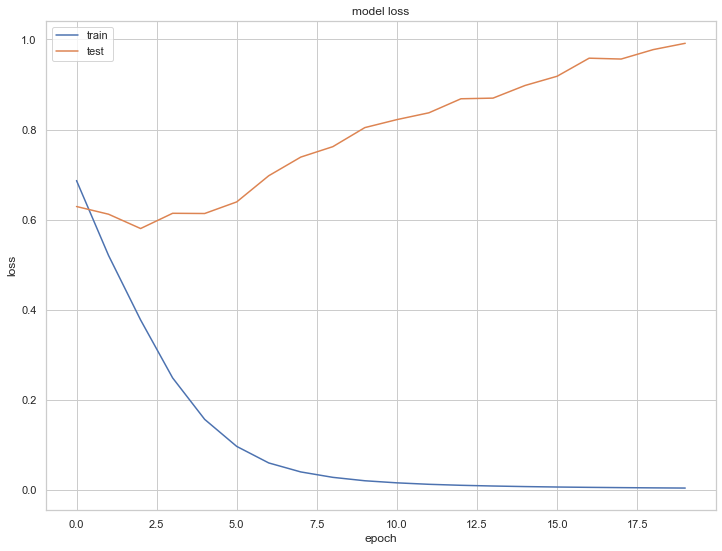

In [209]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=9706, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_BOW_OF, y, validation_split=0.33, epochs=20)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<b>5. Bag-of-Words, other features, other speech features - sentiment related (TF_ALL)</b>

Train on 292 samples, validate on 145 samples
Epoch 1/20
292/292 [==============================] - 13s 43ms/sample - loss: 0.6829 - acc: 0.6575 - val_loss: 0.6216 - val_acc: 0.7379
Epoch 2/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.4357 - acc: 0.8425 - val_loss: 0.6059 - val_acc: 0.7310
Epoch 3/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.2827 - acc: 0.9349 - val_loss: 0.6273 - val_acc: 0.7448
Epoch 4/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.1803 - acc: 0.9692 - val_loss: 0.6142 - val_acc: 0.7724
Epoch 5/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.1086 - acc: 0.9932 - val_loss: 0.6872 - val_acc: 0.7586
Epoch 6/20
292/292 [==============================] - 4s 12ms/sample - loss: 0.0659 - acc: 0.9966 - val_loss: 0.6958 - val_acc: 0.7586
Epoch 7/20
292/292 [==============================] - 4s 13ms/sample - loss: 0.0428 - acc: 1.0000 - val_loss: 0.7678 - val_acc: 0.7655
Epoch 8/

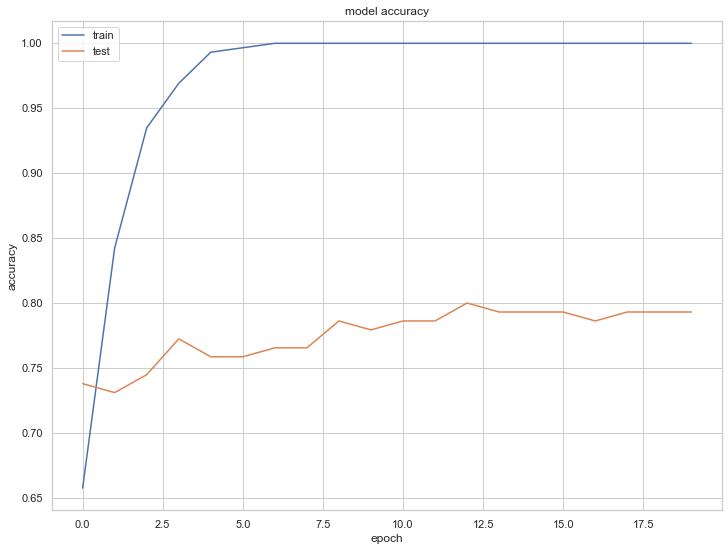

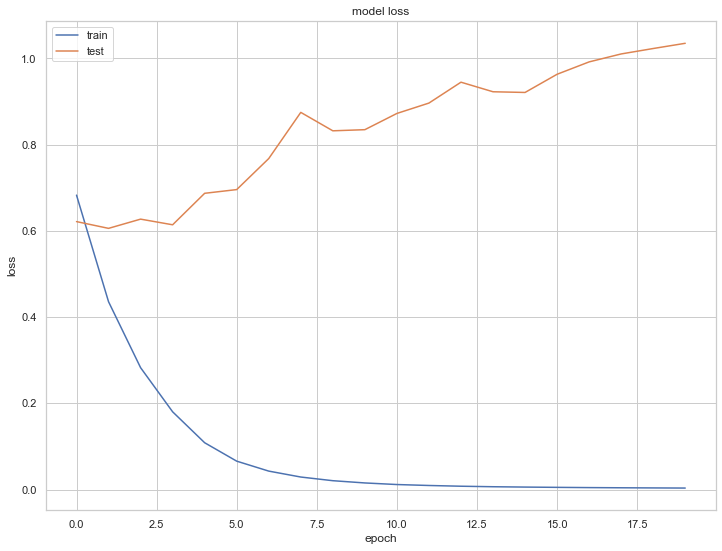

In [211]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=9708, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_ALL, y, validation_split=0.33, epochs=20)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###  TensorFlow Model Comparison Table 
(20 epochs, Adam optimizer, two hidden layers, 24/24 capacity, validation split 0.33)

| Metric/Algorithm | TF_BOW | TF_OS | TF_OS_COUNT | TF_OS_SENT | TF_OF| TF_BOW_OF | TF_ALL | 
| :-:| --- | --- | --- | --- | --- | --- | --- | 
|  acc  | 1.0000 | 0.6644 | 0.7260| 0.7432 | <b>0.8082</b> | 1.0000 | 1.0000 |
|  val_acc | 0.7655 | 0.6966 | 0.7103 | 0.7241 | <b>0.8276</b> | 0.8000 | 0.7931 |
|  loss| 0.0029| 0.7355 | 0.6282 | 0.5660  | <b>0.3994</b> | 0.0042 | 0.0034 |
|  val_loss | 1.2700 | 0.6960 | 0.6691 | 0.5919 | <b>0.4371</b> | 0.9915  | 1.0351 |

The results of these tests are mixed. A one-size-fits-all topology was used for these tests to get a sense of how training the same model with the various feature sets compared. It is possible that with further tuning the results could be improved.

Several of the models, and in particular all that included the Bag-of-Words features, showed clear signs of overfitting. Several of the models had accuracy less than the Naive Classifier. Most of the models did not have promising accuracy and loss graphs.

The one model that does look promising is TF_OF, which trains only on the Other Features set. This appeared to converge and had validaton accuracy of 82.76% which is better than the naive classifier and similar to the best SVM model which achieved 82.58% accuracy. This model could potentially be a candidate for further tuning, particularly using TensorFlow techniques for cllassifying imbalanced data.

## 2.5. Conclusion

I have identified two promising models which are candidates for further tuning and evaluation:

<ul><li>SVM_BOW_OF (SVM trained on Bag-of-Word and Other Features)</li>
<li>TF_OF (TensorFlow trained on Other Features only)</li></ul>

These achieved similar accuracies (82.58% and 82.76%) and outperformed the Naive Classifier.

In the final part of my project, I will continue tuning my models, analyze their performance, and present conclusions including potential applications of this work.

## 2.6. Sources Used for Model Development

- Abercrombie, G. and Batista-Navarro, R. (2020). ‘ParlVote: A Corpus for Sentiment Analysis of Political Debates.’ 12th Language Resources and Evaluation Conference. Marseille, France, 11-16 May. Paris: European Language Resources Association. (Online). Available at: https://www.aclweb.org/anthology/2020.lrec-1.624/ (Accessed: 13 April 2021).<br>
- Albon, C. (2017) 'Color Palettes in Seaborn.' <i>Chrisalbon.com.</i> Available at: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/ (Accessed 17 April 2021).<br>
- Budhwar, A. (2018). Predicting the Vote Using Legislative Speech. M.Sc. Thesis. California Polytechnic State University. Available at: https://digitalcommons.calpoly.edu/theses/1818 (Accessed: 7 April 2021).<br>
- TensorFlow (n.d) <i>Classification on imbalanced data</i>. Available at: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data [Accessed: 17 April 2021).
